# Lab 1: Identification of Damping Using Log Decrement

In [1]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math

Beam Properties
---------------------

In [3]:
l=21.75*0.0254;# length in meters
h=0.5*0.0254;# height in meters
w=1*0.0254;# width in meters
rho=2700;# density in kg/cubicmeter
E=7.31e10;# youngs modulus in Pa
I = (1/12)*w*h**3; # moment of inertia (m^4)
k = (3*E*I)/l**3; # stiffness (N/m)
V = l*w*h;# volume (m^3)
m = rho*V;# mass (kg)
wn = math.sqrt(k/m) # analytical natural frequency of massless beam with concentrated mass
wn2=(1.875)**(2)*math.sqrt((E*I)/(m*(l)**3)) #natural freqency of a uniform section beam
#c_cr = 2*math.sqrt(k*m); # critical damping coefficient

In [4]:
wn

108.259140771331

In [5]:
wn2

219.7386705465195

Acceleration vs Time plot
------------------------------------

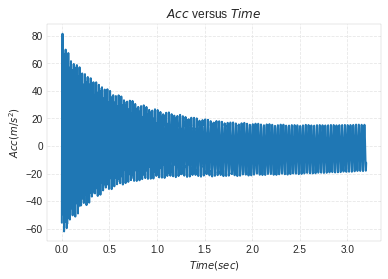

In [9]:
# Acc vs Time

%matplotlib inline
mat_contents=sio.loadmat('Case1-2.mat')
Time_domain = mat_contents['Time_domain']
Time_chan_2 = mat_contents['Time_chan_2']
Time_chan_2 = Time_chan_2*(9.81);
mean=sum(Time_chan_2)/np.size(Time_chan_2);
Accel = Time_chan_2-mean;
# The acceleration values from Bobcat will be in Gs. So,  to convert them to m/s^2,
# we will have to multiply the vector by 9.81
plt.plot(Time_domain, Accel)
plt.grid('on')
plt.ylabel('$Acc(m/s^2)$')
plt.xlabel('$Time(sec)$')
plt.title('$Acc$ versus $Time$')
plt.show()

 Data Analysis
 --------------------

In [12]:
# Enter values from plots for calculations. Use data cursor to
# obtain x and t values.
x1 = 81.45;
t1 = 0.007031;
x2 = 15.44;
t2 = 3.181;
n = 106;
time = t2-t1;


Log Decrement Method
--------------------------

In [14]:
d = (1/n)*math.log(x1/x2) # delta
d

0.015688941419353057

In [20]:
z= d/np.sqrt(4*math.pi**2+d**2) # zeta
z

0.0024969647946533331

In [21]:
Td = (time/n)#damped time period
Td

0.029943103773584907

In [23]:
wd = 2*math.pi/Td #damped natural frequency
wd

209.83747559003763

In [26]:
wne = wd/np.sqrt(1-z**2) # natural frequency in rad/sec
wne

209.83812974392472

In [29]:
k2=(wne**2)*m # one way to use experimental zeta and nat freq to calculate C
k2

21186.684200875719

In [34]:
c_cr = 2*np.sqrt(k2*m) # critical


In [35]:
c=c_cr*z # damping constant
c

0.50422108345689065

In [53]:
x = Accel/-(wd**2)
x[0]

array([ 0.00126369], dtype=float32)

Using Vibration toolbox for comparison
------------------------------------------------------

In [56]:

ax=max(x) # max amplitude
initialvel=-ax*wne
vtb.free_response(m=rho*V, c=c_cr*z, k=(wne**2)*m, x0=0.00126369, v0=-ax*wne, max_time=3.2)

#vtb.time_plot(m=r*v, c=.2, k=(3*E*I)/(l**3), x0=0, v0=Time[1]*Acc[1], max_time=3.5)

(array([ 0.        ,  0.00400501,  0.00801001,  0.01201502,  0.01602003,
         0.02002503,  0.02403004,  0.02803504,  0.03204005,  0.03604506,
         0.04005006,  0.04405507,  0.04806008,  0.05206508,  0.05607009,
         0.06007509,  0.0640801 ,  0.06808511,  0.07209011,  0.07609512,
         0.08010013,  0.08410513,  0.08811014,  0.09211514,  0.09612015,
         0.10012516,  0.10413016,  0.10813517,  0.11214018,  0.11614518,
         0.12015019,  0.12415519,  0.1281602 ,  0.13216521,  0.13617021,
         0.14017522,  0.14418023,  0.14818523,  0.15219024,  0.15619524,
         0.16020025,  0.16420526,  0.16821026,  0.17221527,  0.17622028,
         0.18022528,  0.18423029,  0.18823529,  0.1922403 ,  0.19624531,
         0.20025031,  0.20425532,  0.20826033,  0.21226533,  0.21627034,
         0.22027534,  0.22428035,  0.22828536,  0.23229036,  0.23629537,
         0.24030038,  0.24430538,  0.24831039,  0.25231539,  0.2563204 ,
         0.26032541,  0.26433041,  0.26833542,  0.2

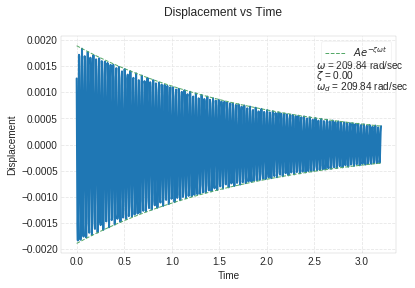

In [76]:
vtb.time_plot(m=rho*V, c=c_cr*z, k=(wne**2)*m, x0=0.00126369, v0=-ax*wne, max_time=3.2)

In [72]:

#plt.show()
#plt.plot(Time_domain, Accel,hold=true)
#plt.grid('on')
#plt.title('$Acc$ versus $Time$')
#plt.xlabel('$Time(sec)$')
#plt.ylabel('$Acc(m/s^2)$')
#legend('Estimated Displacement','Experimental Displacement')
#vtb.time_plot(m=rho*V, c=c_cr*z, k=(wne**2)*m, x0=0.00126369, v0=-ax*wne, max_time=3.2, hold=true)
#plt.show()
#fig = plt.figure()
#ax1 = fig.add_subplot(Time_domain, Accel)
#ax2 = fig.add_subplot(vtb.time_plot(m=rho*V, c=c_cr*z, k=(wne**2)*m, x0=0.00126369, v0=-ax*wne, max_time=3.2))
#plt.tight_layout()
#ax1.set_ylabel('Normalized Amplitude (dB)')
#ax1.set_title('Normalized Amplitude vs Frequency Ratio')
#ax2.set_xlabel('Frequency Ratio')
#ax2.set_ylabel('Phase Lag (deg)')
#ax2.set_title('Phase vs Frequency Ratio')
#plt.show()

TypeError: unhashable type: 'numpy.ndarray'

3 Mode shapes
---------------------

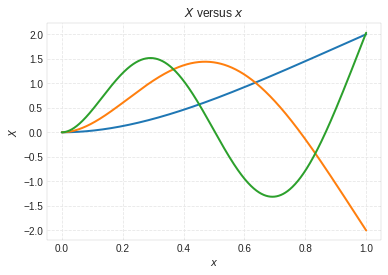

In [74]:
# first three mode shapes
%matplotlib inline
beta = np.array([1.87510407, 4.69409113, 7.85475744])
alpha = np.array([0.7341, 1.0185, 0.9992])
x = np.linspace(0, 1, num=1000)
for i in range(0, 3):
    X=np.cosh(beta[i]*x)-np.cos(beta[i]*x)-alpha[i]*(np.sinh(beta[i]*x)-np.sin(beta[i]*x))
    plt.plot(x, X)
    plt.grid('on')
    plt.ylabel('$X$')
    plt.xlabel('$x$')
    plt.title('$X$ versus $x$')
plt.show()